In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing data sets 

In [5]:
url='https://raw.githubusercontent.com/12345k/IPL-Dataset/master/IPL/data.csv'
ipl=pd.read_csv(url)
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [7]:
bats=pd.read_csv('batting.qz.txt',sep='\t')
a=bats.columns[1:]
bats.drop('Team',axis=1,inplace=True)
bats.columns=a
bats.head(20)

,PLAYER,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,Team
0,Virat Kohli,177.0,169.0,26.0,5412.0,113,37.84,"4,112",131.61,5.0,36.0,480.0,190.0,Royal Challengers Bangalore
1,Suresh Raina,193.0,189.0,28.0,5368.0,100*,33.34,"3,914",137.14,1.0,38.0,493.0,194.0,Chennai Super Kings
2,Rohit Sharma,188.0,183.0,28.0,4898.0,109*,31.60,"3,744",130.82,1.0,36.0,431.0,194.0,Mumbai Indians
3,David Warner,126.0,126.0,17.0,4706.0,126,43.17,"3,305",142.39,4.0,44.0,458.0,181.0,Sunrisers Hyderabad
4,Shikhar Dhawan,159.0,158.0,21.0,4579.0,97*,33.42,"3,669",124.80,0.0,37.0,524.0,96.0,Delhi Capitals
5,Chris Gayle,125.0,124.0,15.0,4484.0,175*,41.13,"2,969",151.02,6.0,28.0,369.0,326.0,Kings XI Punjab
6,MS Dhoni,190.0,170.0,65.0,4432.0,84*,42.20,"3,215",137.85,0.0,23.0,297.0,209.0,Chennai Super Kings
7,Robin Uthappa,177.0,170.0,17.0,4411.0,87,28.83,"3,380",130.50,0.0,24.0,435.0,156.0,Rajasthan Royals
8,AB de Villiers,154.0,142.0,32.0,4395.0,133*,39.95,"2,906",151.23,3.0,33.0,357.0,212.0,Royal Challengers Bangalore
9,Gautam Gambhir,154.0,152.0,17.0,4217.0,93,31.23,"3,404",123.88,0.0,36.0,491.0,59.0,Delhi Capitals


In [8]:
def changex(a,df):
    b=[]
    for i in df[a]:
        if type(i)==float or len(i.split(','))==1:
            b.append(i) 
        else:
            if len(i.split(','))==2:
                x=i.split(',')[0]
                y=i.split(',')[1]
                b.append(str(x)+str(y))
    df[a]=b
    return
changex('BF',bats)
bats['BF']=bats['BF'].astype(float)
bats.head()

,PLAYER,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,Team
0,Virat Kohli,177.0,169.0,26.0,5412.0,113,37.84,4112.0,131.61,5.0,36.0,480.0,190.0,Royal Challengers Bangalore
1,Suresh Raina,193.0,189.0,28.0,5368.0,100*,33.34,3914.0,137.14,1.0,38.0,493.0,194.0,Chennai Super Kings
2,Rohit Sharma,188.0,183.0,28.0,4898.0,109*,31.60,3744.0,130.82,1.0,36.0,431.0,194.0,Mumbai Indians
3,David Warner,126.0,126.0,17.0,4706.0,126,43.17,3305.0,142.39,4.0,44.0,458.0,181.0,Sunrisers Hyderabad
4,Shikhar Dhawan,159.0,158.0,21.0,4579.0,97*,33.42,3669.0,124.80,0.0,37.0,524.0,96.0,Delhi Capitals


In [ ]:
def changey(a,df):
    b=[]
    for i in df[a]:
        if type(i)==float or i.endswith('*')==False:
            b.append(i) 
        else:
            if i.endswith('*'):
                i=i+')'
                x=i.split('*')[0]
                y='.1'
                b.append(str(x)+str(y))
    df[a]=b
    return
changey('HS',bats)
bats['HS']=bats['HS'].astype(float)
bats=bats.dropna()
bats.head(10)

,PLAYER,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,Team
0,Virat Kohli,177.0,169.0,26.0,5412.0,113.0,37.84,4112.0,131.61,5.0,36.0,480.0,190.0,Royal Challengers Bangalore
1,Suresh Raina,193.0,189.0,28.0,5368.0,100.1,33.34,3914.0,137.14,1.0,38.0,493.0,194.0,Chennai Super Kings
2,Rohit Sharma,188.0,183.0,28.0,4898.0,109.1,31.60,3744.0,130.82,1.0,36.0,431.0,194.0,Mumbai Indians
3,David Warner,126.0,126.0,17.0,4706.0,126.0,43.17,3305.0,142.39,4.0,44.0,458.0,181.0,Sunrisers Hyderabad
4,Shikhar Dhawan,159.0,158.0,21.0,4579.0,97.1,33.42,3669.0,124.80,0.0,37.0,524.0,96.0,Delhi Capitals
5,Chris Gayle,125.0,124.0,15.0,4484.0,175.1,41.13,2969.0,151.02,6.0,28.0,369.0,326.0,Kings XI Punjab
6,MS Dhoni,190.0,170.0,65.0,4432.0,84.1,42.20,3215.0,137.85,0.0,23.0,297.0,209.0,Chennai Super Kings
7,Robin Uthappa,177.0,170.0,17.0,4411.0,87.0,28.83,3380.0,130.50,0.0,24.0,435.0,156.0,Rajasthan Royals
8,AB de Villiers,154.0,142.0,32.0,4395.0,133.1,39.95,2906.0,151.23,3.0,33.0,357.0,212.0,Royal Challengers Bangalore
9,Gautam Gambhir,154.0,152.0,17.0,4217.0,93.0,31.23,3404.0,123.88,0.0,36.0,491.0,59.0,Delhi Capitals


# Analysis of first data set 

In [9]:
def team_name(name):
    if(name == 'MI'):
        return "Mumbai Indians"
    elif(name == 'DD'):
        return "Delhi Daredevils"
    elif(name == 'PW'):
        return "Pune Warriors"
    elif(name == 'GL'):
        return "Gujarat Lions"
    elif(name == 'RPS'):
        return "Rising Pune Supergiant"
    elif(name == 'RR'):
        return "Rajasthan Royals"
    elif(name == 'RCB'):
        return "Royal Challengers Bangalore"
    elif(name == 'CSK'):
        return "Chennai Super Kings"
    elif(name == 'KKR'):
        return "Kolkata Knight Riders"
    elif(name == 'KXIP'):
        return "Kings XI Punjab"
    elif(name == 'DC'):
        return "Deccan Chargers"

Mean Calculations

In [11]:
team=team_name(input("Enter team: "))
mean_runs = int(ipl[(ipl['winner']==team)&(ipl['win_by_runs']!=0)]['win_by_runs'].mean())
mean_wickets = int(ipl[(ipl['winner']==team)&(ipl['win_by_wickets']!=0)]['win_by_wickets'].mean())
print("mean runs",mean_runs)
print("mean wickets",mean_wickets)

Enter team: CSK
mean runs 34
mean wickets 6


median

In [12]:
team=team_name(input("Enter team: "))
median_runs = int(ipl[(ipl['winner']==team)&(ipl['win_by_runs']!=0)]['win_by_runs'].median())
median_wickets = int(ipl[(ipl['winner']==team)&(ipl['win_by_wickets']!=0)]['win_by_wickets'].median())
print("median runs",median_runs)
print("median wickets",median_wickets)

Enter team: CSK
median runs 24
median wickets 6


Variance calculation 

In [13]:
team=team_name(input("Enter team: "))
var_runs = int(ipl[(ipl['winner']==team)&(ipl['win_by_runs']!=0)]['win_by_runs'].var())
var_wickets = int(ipl[(ipl['winner']==team)&(ipl['win_by_wickets']!=0)]['win_by_wickets'].var())
print("variance runs",var_runs)
print("variance wickets",var_wickets)

Enter team: CSK
variance runs 778
variance wickets 3


standard deviation 


In [14]:
team=team_name(input("Enter team: "))
std_runs = int(ipl[(ipl['winner']==team)&(ipl['win_by_runs']!=0)]['win_by_runs'].std())
std_wickets = int(ipl[(ipl['winner']==team)&(ipl['win_by_wickets']!=0)]['win_by_wickets'].std())
print("Standard deviation runs: ",std_runs)
print("Standard deviation wickets: ",std_wickets)

Enter team: CSK
Standard deviation runs 27
Standard deviation wickets 1


Skewness

In [15]:
team=team_name(input("Enter team: "))
sk_runs = round(ipl[(ipl['winner']==team)&(ipl['win_by_runs']!=0)]['win_by_runs'].skew(),2)
sk_wickets = round(ipl[(ipl['winner']==team)&(ipl['win_by_wickets']!=0)]['win_by_wickets'].skew(),2)
print("Skewness runs: ",sk_runs)
print("Skewness wickets: ",sk_wickets)

Enter team: CSK
Skewness runs:  0.94
Skewness wickets:  0.19


kurtosis

In [16]:
team=team_name(input("Enter team: "))
k_runs = round(ipl[(ipl['winner']==team)&(ipl['win_by_runs']!=0)]['win_by_runs'].kurtosis(),2)
k_wickets = round(ipl[(ipl['winner']==team)&(ipl['win_by_wickets']!=0)]['win_by_wickets'].kurtosis(),2)
print("kurtosis runs: ",k_runs)
print("kurtosis wickets: ",k_wickets)

Enter team: CSK
kurtosis runs:  -0.25
kurtosis wickets:  -0.98


quartiles

In [17]:
team=team_name(input("Enter team: "))
q1_runs , q2_runs, q_runs  = round(ipl[(ipl['winner']==team)&(ipl['win_by_runs']!=0)]['win_by_runs'].quantile([0.25,0.50,0.75]),2)
q1_wic , q2_wic, q_wic  = round(ipl[(ipl['winner']==team)&(ipl['win_by_wickets']!=0)]['win_by_wickets'].quantile([0.25,0.50,0.75]),2)
print("q1 runs: ",q1_runs)
print("q2 runs: ",q2_runs)
print("q3 runs: ",q_runs)
print("q1 wickets: ",q1_wic)
print("q2 wickets: ",q2_wic)
print("q2 wickets: ",q_wic)

Enter team: CSK
q1 runs:  13.25
q2 runs:  24.0
q3 runs:  47.25
q1 wickets:  5.0
q2 wickets:  6.0
q2 wickets:  8.0


iqr

In [18]:
iqr_runs=q_runs-q1_runs
iqr_wic =q_wic - q1_wic
print("iqr runs",iqr_runs)
print("iqr wickets",iqr_wic)

iqr runs 34.0
iqr wickets 3.0


range

In [19]:
runs_min=round(ipl[(ipl['winner']==team)&(ipl['win_by_runs']!=0)]['win_by_runs'].min(),2)
runs_max=round(ipl[(ipl['winner']==team)&(ipl['win_by_runs']!=0)]['win_by_runs'].max(),2)
runs_range=runs_max-runs_min
print("range runs",runs_range)
wic_min=round(ipl[(ipl['winner']==team)&(ipl['win_by_wickets']!=0)]['win_by_wickets'].min(),2)
wic_max=round(ipl[(ipl['winner']==team)&(ipl['win_by_wickets']!=0)]['win_by_wickets'].max(),2)
wic_range=wic_max-wic_min
print("range wickets",wic_range)

range runs 96
range wickets 7


# Analysis of second data set - batting 

Mean

In [ ]:
round(bats.mean(),0)

Mat       96.0
Inns      89.0
NO        16.0
Runs    2218.0
HS        95.0
Avg       30.0
BF      1691.0
SR       131.0
100        1.0
50        13.0
4s       207.0
6s        83.0
dtype: float64

median

In [ ]:
round(bats.median(),0)

Mat       82.0
Inns      77.0
NO        14.0
Runs    1784.0
HS        94.0
Avg       29.0
BF      1412.0
SR       130.0
100        0.0
50        11.0
4s       160.0
6s        61.0
dtype: float64

variance

In [ ]:
round(bats.var(),0)

Mat        1926.0
Inns       1684.0
NO          146.0
Runs    1460052.0
HS          455.0
Avg          35.0
BF       809981.0
SR          168.0
100           1.0
50           95.0
4s        14664.0
6s         3302.0
dtype: float64

standard deviation

In [ ]:
round(bats.std(),0)

Mat       44.0
Inns      41.0
NO        12.0
Runs    1208.0
HS        21.0
Avg        6.0
BF       900.0
SR        13.0
100        1.0
50        10.0
4s       121.0
6s        57.0
dtype: float64

skewness

In [ ]:
round(bats.skew(),0)

Mat     1.0
Inns    1.0
NO      1.0
Runs    1.0
HS      1.0
Avg     0.0
BF      1.0
SR      1.0
100     2.0
50      1.0
4s      1.0
6s      2.0
dtype: float64

kurtosis

In [ ]:
round(bats.kurtosis(),0)

Mat    -1.0
Inns   -0.0
NO      3.0
Runs    0.0
HS      2.0
Avg    -1.0
BF      0.0
SR      4.0
100     7.0
50      2.0
4s      0.0
6s      4.0
dtype: float64

range

In [ ]:

round(bats.max()-bats.min(),0)

Mat      164.0
Inns     160.0
NO        63.0
Runs    4443.0
HS       127.0
Avg       25.0
BF      3426.0
SR        80.0
100        6.0
50        44.0
4s       463.0
6s       302.0
dtype: float64

quartile

In [ ]:
q3_bats=bats.quantile(0.75)
q1_bats=bats.quantile(0.25)

iqr

In [ ]:
print(round(q3_bats-q1_bats),0)

Mat       65.0
Inns      64.0
NO        16.0
Runs    1425.0
HS        24.0
Avg        8.0
BF      1177.0
SR        14.0
100        1.0
50        10.0
4s       150.0
6s        52.0
dtype: float64 0


# Hypothesis testing 

In [ ]:
import scipy.stats as st

H0: Mean of number of wins each year is equal to 6.

HA: Mean of number of wins each year is greater than 6

alpha =0.05

In [ ]:
team=team_name(input("Enter the desired team: "))
years=np.array(ipl['season'].value_counts().index)
years.sort()
sums=[]
for i in years:
    data=ipl.groupby('season').get_group(i)
    data=data[data['winner']==team].shape[0]
    sums.append(data)
sums=np.array(sums)
x=sums.mean()
std =sums.std()
mu=6
alpha=0.05
n=len(sums)

z_critical=abs(st.norm.ppf(alpha))
z=(x-mu)/(std /np.sqrt(n))

if(z<z_critical):
    print("accepted")
else:
    print("rejected")

Enter the desired team: KKR
rejected


H0: Mean of  wins by runs by a team equal to 50.

HA: Mean of  wins by runs by a team is greater than 50

alpha =0.05

In [ ]:
team=team_name(input("Enter team: "))
data=ipl[(ipl['winner']==team)]['win_by_runs']
x = data.mean()
std = data.std()
mu=50
alpha=0.05
n=len(data)

z_critical=st.norm.ppf(alpha)
z=(x-mu)/(std /np.sqrt(n))

if(z<z_critical):
    print("accepted")
else:
    print("rejected")

Enter team: CSK
accepted


H0: Mean of no. of innings played by any player whose name starts with V is equal to 100.

HA: Mean of no. of innings played by any player whose name starts with V is greater than 100

alpha =0.05



In [ ]:
data=bats[bats['PLAYER'].str.startswith('V')==True]
x=data['Inns'].mean()
mu=100
sd=data['Inns'].std()

alpha=0.05

n=len(data)
z=float(x-mu)/(sd/np.sqrt(n))

p=round(1-st.norm.cdf(z),2)
print(p,alpha)
if alpha>p:
    print("Null Hypothesis is accepted")
else:
    print("Null hypothesis is rejected")

0.39 0.05
Null hypothesis is rejected


H0: Average no. of Sixes hit by MI players is equal to 60 

HA: Average no. of Sixes hit by MI players is  less than 60

alpha =0.1

In [ ]:
data=bats[bats['Team']=='Mumbai Indians']
x=int(data['6s'].mean())

mu=60
sd=data['6s'].std()
alpha=0.1
n=len(data)
z=float(x-mu)/(sd/np.sqrt(n))

p=round(1-st.norm.cdf(z),2)
print(p,alpha)
if alpha>p:
    print("Null Hypothesis is accepted")
else:
    print("Null hypothesis is rejected")

0.09 0.1
Null Hypothesis is accepted


H0: Average no. of deliveries faced by CSK players is equal to 3000 

HA: Average no. of deliveries faced by CSK players is  less than 3000

alpha =0.05

In [ ]:
data=bats[bats['Team']=='Chennai Super Kings']
x=int(data['BF'].mean())
mu=3000
sd=data['BF'].std()

alpha=0.05
n=len(data)
z=float(x-mu)/(sd/np.sqrt(n))

p=round(1-st.norm.cdf(z),2)
print(p,alpha)
if alpha>p:
    print("Null Hypothesis is accepted")
else:
    print("Null hypothesis is rejected")

1.0 0.05
Null hypothesis is rejected


#Simple Linear Regression- For a given season , predict wins by margin of runs 

In [ ]:
X = ipl['season'].value_counts().index
X=np.array(X)
X.sort()
y=[]
for i in X:
    z=ipl[(ipl['season']==i)&(ipl['win_by_runs']!=0)]['win_by_runs'].value_counts().sum()
    print(i,z)
    y.append(z)


2008 24
2009 27
2010 31
2011 33
2012 34
2013 37
2014 22
2015 32
2016 21


In [ ]:
A=X
B=y
m_x=np.mean(X)
m_y=np.mean(y)

n=len(X)
numer=0
denom=0

for i in range(n):
    numer+=(X[i]-m_x)*(y[i]-m_y)
    denom+=(X[i]-m_x)**2
b1=round(numer/denom,2)
b0=round(m_y -(b1*m_x),2)
print(str(b0),'+',str(b1),'x')

max_x = np.max(X)
min_x = np.min(X)

# Calculating line values x and y

x = np.linspace(min_x, max_x, 10) # Returns number spaces evenly w.r.t interval
Y = b0 + b1 * x

391.16 + -0.18 x


In [ ]:
X=X.reshape((len(X),1))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
r2_score = regressor.score(X_test, y_test)
print(np.sqrt(mse))
print(r2_score)

8.474316250696893
-1.8725614366730179


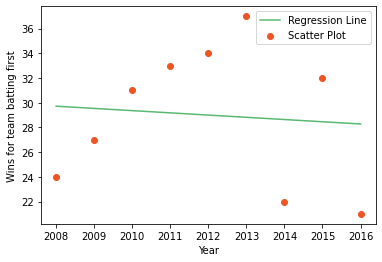

In [ ]:
plt.plot(x, Y, color='#58b970', label='Regression Line')

# Ploting Scatter Points
plt.scatter(A, B, c='#ef5423', label='Scatter Plot')
plt.xlabel('Year')
plt.ylabel('Wins for team batting first')
plt.legend()
plt.show()

Testing the year 2020

In [ ]:
x=2020
y=int(b0 + b1 * x)
print("Team batting first will win",y,"times")

Team batting first will win 27 times


#Simple Linear Regression - Relation b/w balls faced with the no. of boundaries

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
ipl['winner']=ipl['winner'].replace(np.nan, 'none', regex=True)
labelencoder = LabelEncoder()

x=labelencoder.fit_transform(ipl['toss_winner'])
y=labelencoder.fit_transform(ipl['winner'].values)
x=x.reshape((len(x),1))
reg=LinearRegression().fit(x,y)

y_pred=reg.predict(x)
mse=mean_squared_error(y,y_pred)
r2_score=reg.score(x,y)

print(np.sqrt(mse))
print(r2_score)

3.4538469469285147
0.20678934629966106


In [ ]:
X=bats['BF'].values
y=bats['4s'].values
A=X
B=y
m_x=np.mean(X)
m_y=np.mean(y)
n=len(X)

numer=0
denom=0

for i in range(n):
    numer+=(X[i]-m_x)*(y[i]-m_y)
    denom+=(X[i]-m_x)**2
b1=round(numer/denom,2)
b0=round(m_y -(b1*m_x),2)
print(str(b0),'+',str(b1),'x')

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y

x = np.linspace(min_x, max_x, 1000) # Returns number spaces evenly w.r.t interval
Y = b0 + b1 * x
X=X.reshape((len(X),1))

-12.84 + 0.13 x


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
r2_score = regressor.score(X_test, y_test)
print(np.sqrt(mse))
print(r2_score)

41.06601531507432
0.9127368783296472


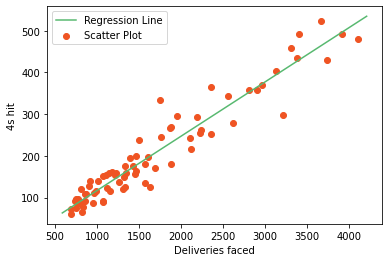

In [ ]:
plt.plot(x, Y, color='#58b970', label='Regression Line')

# Ploting Scatter Points

plt.scatter(A, B, c='#ef5423', label='Scatter Plot')
plt.xlabel('Deliveries faced')
plt.ylabel('4s hit')
plt.legend()
plt.show()

Test a Player . Player considered is Virat Kohli

In [ ]:
x=bats[bats['PLAYER']=='Virat Kohli']['BF']+400
y= b0 + b1 * x
print("After",int(x[0]),"deliveries , Virat would have scored",int(y[0]),"Boundaries by the way he is playing")

After 4512 deliveries , Virat would have scored 573 Boundaries by the way he is playing


#Multiple Linear Regression - Based on Innings, runs , deliveries faced,4s,6s predict the strike rate for a player

In [ ]:
X=bats[['Inns','Runs','BF','4s','6s']].values
Y=bats['SR'].values
X=X.reshape(len(X),5)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
r2_score = regressor.score(X_test, y_test)
print(np.sqrt(mse))
print(r2_score)

5.3560578510626895
0.594947598078166


In [ ]:
b0=regressor.intercept_
b1=regressor.coef_
x=bats[bats['PLAYER']=='MS Dhoni'][['Inns','Runs','BF','4s','6s']].values
x[0][0]+=10
x[0][1]+=200
x[0][2]+=150
x[0][3]+=20
x[0][4]+=6
y=0
for i in range(len(x)):
    y+=b1[i]*x[0][i]
y+=b0
print("The average strike rate for Dhoni after the following changes is",round(y,1))

The average strike rate for Dhoni after the following changes , is 133.9
